In [1]:
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
X = boston.data
Y = boston.target

In [14]:
X.shape

(506, 13)

##### In this, we want to get to a point where we find more complex boundaries using linear regression.

Lets assume we have 1d linear regression.Generally we find y = mx + c such that cost function is minimised.

So one thing we can do here is add dummy column x_x which is  x^2 . So if the x is 1,2,3,1 , x_x is 1, 4, 9, 1. And now it is 
not 1d linear regression anymore it is 2d, and now we are going to find y = m1x + m2x_x + c.

Its like trying to find plane in 3d  space which fits data best and two dimensions are x1 and x2.

We will use algo to find these coefficients and we will also find m and c which fits data well. 

Also x_x is dependent on x.

If you draw this equation in less dimension lets say in 1d, you will get a parabola.

In a nutshell lets say if we had x, y and we want to find linear regression of x, it will do y = mx+c.

SO the concept is lets add a dummy feature x_x in x and y and apply linear regression on x, it will apply on 
y = m1x1 + m2x2 + c where x1 is x and x2 is x_x.

Now we can plot it in 3d, not in 2d.

Once you've found m1, m2, youve actually found y = m1x + m2x^2 +c and we can see that in the 2d plane, weve found something
more complex than what we were able to do earlier.

We can add more features lets say x_x_x which is x3 and not just polynomials, but also logarithmic expressions lets say
logx.

Lets say we have x1, x2, x3 we can have x1_x1, x2_x1, x3_x1, which are 2 degree polynomials.  
For 3 degree polynomials we can add x1_x2_x3.

Lets say for n degree, for first we choose 2 degree which is n^2 complexity actually 1/2 n^2. for 3 degree, it is n^3.

In the original n dimensional space, we are going to fing more complex decision functions to fit our data.

So if there are lots of complex functions we might find a solution like this in the graph.
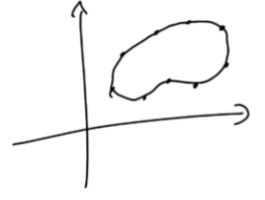

What we are doing is we are effectively remembering our training datapoints and if we are given test data points which are 
completely new, the results will be really bad and fail.





Lets say the boundaries are very close to each point like in the graph.
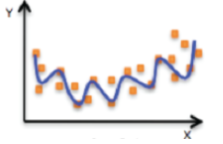

It might perform very good on training data and it might perform very bad on testing data.
It is called overfitting.

In [18]:
import pandas as pd
df = pd.DataFrame(X)
print(boston.feature_names)
df.columns = boston.feature_names

## here we are adding new feature age_age which is square of age in the dataset.
df["age_age"] = df.AGE ** 2
df.describe()

## We make variable where we add dataset in which we added a new feature.

X2 = df.values
X2.shape

## Now after adding the new feature, we split the data for training and testing.


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


(506, 14)

In [19]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, random_state = 0)
X2_train, X2_test, Y2_train, Y2_test = model_selection.train_test_split(X2, Y, random_state = 0) ## splitting added feature 
                                                                                                 ## data for training and testing.
## It might possible that we get the different datas for two different datasets, so to avoid that we added random_state = 0
## which means each time, it will take same data in both the calls.

In [20]:
from sklearn.linear_model import LinearRegression
alg1 = LinearRegression()
alg2 = LinearRegression() ## algo for new feature dataset

In [21]:
alg1.fit(X_train, Y_train)
alg2.fit(X2_train, Y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
Y_pred = alg1.predict(X_test)
train_score = alg1.score(X_train, Y_train)
test_score = alg1.score(X_test, Y_test)
print("Train Score: ", train_score)
print("Test Score: ", test_score)

train2_score = alg2.score(X2_train, Y2_train)
test2_score = alg2.score(X2_test, Y2_test)
print("Train2 Score: ", train2_score)
print("Test2 Score: ", test2_score)

## As we can see, the train, test score is better than the first dataset.
## More features we add, better the training scores becomes, and test score might become bad.

Train Score:  0.769744837056
Test Score:  0.635362078667
Train2 Score:  0.770693014476
Test2 Score:  0.643183981787
